# Pandas 기초
---


In [1]:
import numpy as np
import pandas as pd 

## 1. 데이터 불러오기

### (1) excel 데이터 불러오기

In [2]:
sample_1 = pd.read_excel('./files/sample_1.xlsx', 
                         header=1, 
                         skipfooter=2, 
                         usecols='A:C')
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [3]:
sample_2 = pd.read_excel('./files/sample_1.xlsx', 
                         header=1, 
                         skipfooter=2, 
                         usecols='A:C',
                        names=['A','B','C'])
sample_2

,A,B,C
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [4]:
sample_1.dtypes

국적코드    object
성별      object
입국객수     int64
dtype: object

In [5]:
# int를 float으로 바꾸기
sample_1 = pd.read_excel('./files/sample_1.xlsx', 
                         header=1, 
                         skipfooter=2, 
                         usecols='A:C',
                        dtype={'입국객수':np.float64})
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320.0
1,A01,여성,191436.0
2,A31,남성,319.0
3,A31,여성,42.0
4,A18,남성,158912.0
5,A18,여성,232943.0


### (2) 데이터 구성 살펴보기

In [6]:
sample_1.head()

,국적코드,성별,입국객수
0,A01,남성,106320.0
1,A01,여성,191436.0
2,A31,남성,319.0
3,A31,여성,42.0
4,A18,남성,158912.0


In [7]:
sample_1.tail()

,국적코드,성별,입국객수
1,A01,여성,191436.0
2,A31,남성,319.0
3,A31,여성,42.0
4,A18,남성,158912.0
5,A18,여성,232943.0


In [8]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국적코드    6 non-null      object 
 1   성별      6 non-null      object 
 2   입국객수    6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [9]:
sample_1.columns

Index(['국적코드', '성별', '입국객수'], dtype='object')

In [10]:
# 연속형 자료 분석
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [11]:
# 범주형 자료 (이산형) 분석
sample_1['성별'].value_counts()

남성    3
여성    3
Name: 성별, dtype: int64

### (3) csv 데이터 불러오기

In [12]:
#fish=pd.read_csv('https://bit.ly/fish_csv',encoding='utf-8') # encoding='euc-kr'
#fish

---
## 2. 데이터 선택하기

### (1) column 기준

In [13]:
sample_1['입국객수']

0    106320.0
1    191436.0
2       319.0
3        42.0
4    158912.0
5    232943.0
Name: 입국객수, dtype: float64

In [14]:
sample_1[['국적코드', '입국객수']]

,국적코드,입국객수
0,A01,106320.0
1,A01,191436.0
2,A31,319.0
3,A31,42.0
4,A18,158912.0
5,A18,232943.0


In [15]:
sample_1['기준년월'] = '2019-11'
sample_1 

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320.0,2019-11
1,A01,여성,191436.0,2019-11
2,A31,남성,319.0,2019-11
3,A31,여성,42.0,2019-11
4,A18,남성,158912.0,2019-11
5,A18,여성,232943.0,2019-11


### (2) row 기준

In [16]:
condition = (sample_1['성별'] == '남성')
print(condition)
sample_1[condition]

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool


,국적코드,성별,입국객수,기준년월
0,A01,남성,106320.0,2019-11
2,A31,남성,319.0,2019-11
4,A18,남성,158912.0,2019-11


In [17]:
sample_1[~(sample_1['성별'] == '남성')]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436.0,2019-11
3,A31,여성,42.0,2019-11
5,A18,여성,232943.0,2019-11


In [18]:
condition = (sample_1['입국객수'] >= 150000) 
sample_1[condition]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436.0,2019-11
4,A18,남성,158912.0,2019-11
5,A18,여성,232943.0,2019-11


In [19]:
conditions = (sample_1['성별'] == '남성') & (sample_1['입국객수'] >= 150000)
print(conditions)
sample_1[conditions]

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool


,국적코드,성별,입국객수,기준년월
4,A18,남성,158912.0,2019-11


In [20]:
conditions = (sample_1['성별'] == '남성') \
    & (sample_1['입국객수'] >= 150000)

sample_1[conditions]

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912.0,2019-11


In [21]:
conditions = (sample_1['국적코드'] == 'A01') \
                | (sample_1['국적코드'] == 'A18')
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320.0,2019-11
1,A01,여성,191436.0,2019-11
4,A18,남성,158912.0,2019-11
5,A18,여성,232943.0,2019-11


### (3) isin method

In [22]:
conditions = (sample_1['국적코드'].isin(['A01', 'A18'])) 
print(conditions) 
sample_1[conditions]

0     True
1     True
2    False
3    False
4     True
5     True
Name: 국적코드, dtype: bool


,국적코드,성별,입국객수,기준년월
0,A01,남성,106320.0,2019-11
1,A01,여성,191436.0,2019-11
4,A18,남성,158912.0,2019-11
5,A18,여성,232943.0,2019-11


In [23]:
conditions = (sample_1['국적코드'].isin(['A01', 'A18'])) 
sample_1[conditions == False]

,국적코드,성별,입국객수,기준년월
2,A31,남성,319.0,2019-11
3,A31,여성,42.0,2019-11


---
## 3. 데이터를 좌우로 통합 ( pd.merge )

In [24]:
code_master = pd.read_excel('./files/sample_codemaster.xlsx')
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


### (1) left 조건

In [25]:
sample_1_code = pd.merge(left=sample_1, 
                         right=code_master,
                         how='left',
                         left_on='국적코드',
                         right_on='국적코드')
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국


### (2) inner 조건

In [26]:
sample_1_code_inner = pd.merge(left=sample_1, 
                               right=code_master,
                               how='inner',
                               left_on='국적코드',
                               right_on='국적코드')
sample_1_code_inner

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A18,남성,158912.0,2019-11,중국
3,A18,여성,232943.0,2019-11,중국


---
## 4. 데이터를 상하로 통합 ( pd.append, pd.concat )

### (1) pd.append()

In [27]:
sample_2 = pd.read_excel('./files/sample_2.xlsx', 
                         header=1, 
                         skipfooter=2, 
                         usecols='A:C')
sample_2['기준년월']='2019-12'
sample_2_code = pd.merge(left=sample_2, 
                         right=code_master,
                         how='left',
                         left_on='국적코드',
                         right_on='국적코드')
sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [28]:
sample = sample_1_code.append(sample_2_code, ignore_index=True)
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국
6,A01,남성,92556.0,2019-12,일본
7,A01,여성,163737.0,2019-12,일본
8,A18,남성,155540.0,2019-12,중국
9,A18,여성,249023.0,2019-12,중국


In [29]:
sample_1_code.append(sample_2_code)

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국
0,A01,남성,92556.0,2019-12,일본
1,A01,여성,163737.0,2019-12,일본
2,A18,남성,155540.0,2019-12,중국
3,A18,여성,249023.0,2019-12,중국


### (2) pd.concat()

In [30]:
sample_concat=pd.concat([sample_1_code, sample_1_code],
                       ignore_index=True,
                       axis=0)
sample_concat

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국
6,A01,남성,106320.0,2019-11,일본
7,A01,여성,191436.0,2019-11,일본
8,A31,남성,319.0,2019-11,NaN
9,A31,여성,42.0,2019-11,NaN


---
## 5. 데이터 저장하기 ( to_excel )

In [31]:
sample.to_excel('./files/sample.xlsx')

In [32]:
sample.to_excel('./files/sample_index_false.xlsx', index=False)

In [33]:
# 하나의 파일에 여러 시트로 저장하는 방법
with pd.ExcelWriter('./files/multiple_sheet.xlsx') as writer:
    sample.to_excel(writer, sheet_name = 'my_sheet1')
    sample.to_excel(writer, sheet_name = 'my_sheet2',
                    index=False,
                   na_rep='NaN')

---
## 6. 데이터 집계하기

### (1) pivot_table

In [34]:
sample_pivot = sample.pivot_table(values='입국객수',
                                  index='국적명',
                                  columns='기준년월',
                                  aggfunc='mean' )
sample_pivot

기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


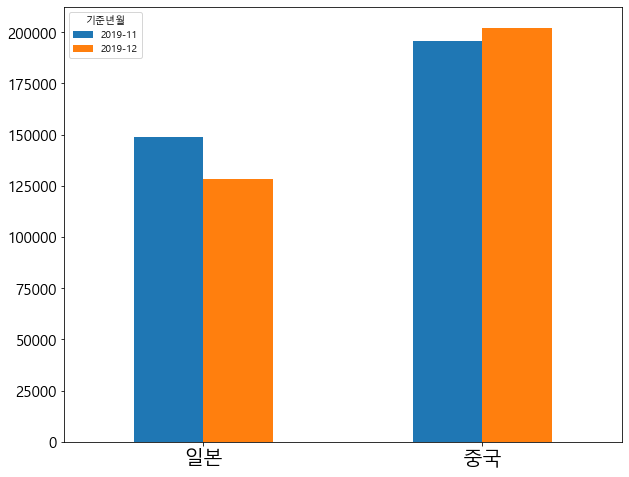

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
sample_pivot.plot(kind='bar',
                 figsize=(10,8),
                 rot=0)
plt.xlabel('')
plt.xticks(size=20)
plt.yticks(size=15)
plt.show()

In [36]:
sample_pivot_2 = sample.pivot_table(values='입국객수',
                                    index='국적명',
                                    aggfunc='max')
sample_pivot_2

,입국객수
국적명,
일본,191436.0
중국,249023.0


### (2) groupby

In [37]:
sample.groupby('성별')['입국객수'].mean()

성별
남성    102729.4
여성    167436.2
Name: 입국객수, dtype: float64